In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Uploading dataset
df= pd.read_csv('train__dataset.csv')
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [3]:
df.shape

(18137, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

In [5]:
#checking null values
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
#creating column "date_of_arrival" to concatenate the arrival year, month and date
df['date_of_arrival'] = df['arrival_year'].astype(str) + '/' + df['arrival_month'].astype(str) + '/' + df['arrival_date'].astype(str)

In [7]:
#droping the 3 columns for the arrival to only leave "date_of_arrival"
df.drop(columns=['arrival_date', 'arrival_month', 'arrival_year'], inplace=True)

In [8]:
#changing date_of_arrival to date type
df['date_of_arrival'] = pd.to_datetime(df['date_of_arrival'],format='mixed', infer_datetime_format=True, errors='coerce',yearfirst=True)

In [9]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival
0,2,0,1,4,0,0,0,118,1,0,0,0,110.80,2,0,2017-12-28
1,2,1,0,2,0,0,0,17,1,0,0,0,145.00,0,1,2018-04-14
2,1,0,1,5,0,0,0,349,0,0,0,0,96.67,0,1,2018-10-04
3,1,0,2,4,0,0,0,69,0,0,0,0,120.00,0,1,2018-06-12
4,2,0,0,4,1,0,0,11,1,0,0,0,69.50,1,0,2018-01-20


In [10]:
#as the "lead_time" is the difference between the booking and the arrival, i will create a column with the booking date
df['booking_creation_date'] = df['date_of_arrival'] - pd.to_timedelta(df['lead_time'], unit='D')

In [11]:
#i will organize the columns in a different way 
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status', 'date_of_arrival',
       'booking_creation_date'],
      dtype='object')

In [12]:
#checking data types
df.dtypes

no_of_adults                                     int64
no_of_children                                   int64
no_of_weekend_nights                             int64
no_of_week_nights                                int64
type_of_meal_plan                                int64
required_car_parking_space                       int64
room_type_reserved                               int64
lead_time                                        int64
market_segment_type                              int64
repeated_guest                                   int64
no_of_previous_cancellations                     int64
no_of_previous_bookings_not_canceled             int64
avg_price_per_room                             float64
no_of_special_requests                           int64
booking_status                                   int64
date_of_arrival                         datetime64[ns]
booking_creation_date                   datetime64[ns]
dtype: object

In [13]:
#checking unique values
df.nunique()

no_of_adults                               5
no_of_children                             5
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                341
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      47
avg_price_per_room                      2722
no_of_special_requests                     6
booking_status                             2
date_of_arrival                          548
booking_creation_date                    612
dtype: int64

In [14]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival,booking_creation_date
count,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18116,18116
mean,1.846777,0.107515,0.811104,2.208965,0.318465,0.031648,0.336770,85.377405,0.806197,0.025087,0.022440,0.151403,103.478868,0.617522,0.327618,2018-05-25 03:30:33.782292224,2018-02-28 17:06:25.515566336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017-07-01 00:00:00,2016-10-17 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000,2018-02-28 00:00:00,2017-12-06 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000,2018-06-12 00:00:00,2018-02-22 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,127.000000,1.000000,0.000000,0.000000,0.000000,120.270000,1.000000,1.000000,2018-09-19 00:00:00,2018-06-12 00:00:00
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000,2018-12-31 00:00:00,2018-12-29 00:00:00
std,0.516020,0.408901,0.873470,1.426365,0.629140,0.175066,0.772865,86.611736,0.645972,0.156393,0.370078,1.714135,35.474103,0.787941,0.469357,NaN,NaN


In [15]:
#droping the rows where min adults are 0
df.drop(df[df['no_of_adults'] == 0].index, inplace = True)

In [16]:
#columns for outlier removal
cols = ['lead_time', 'avg_price_per_room']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
#standardizing the data
scaler = StandardScaler()
df[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(df[['lead_time', 'avg_price_per_room']])

<Axes: >

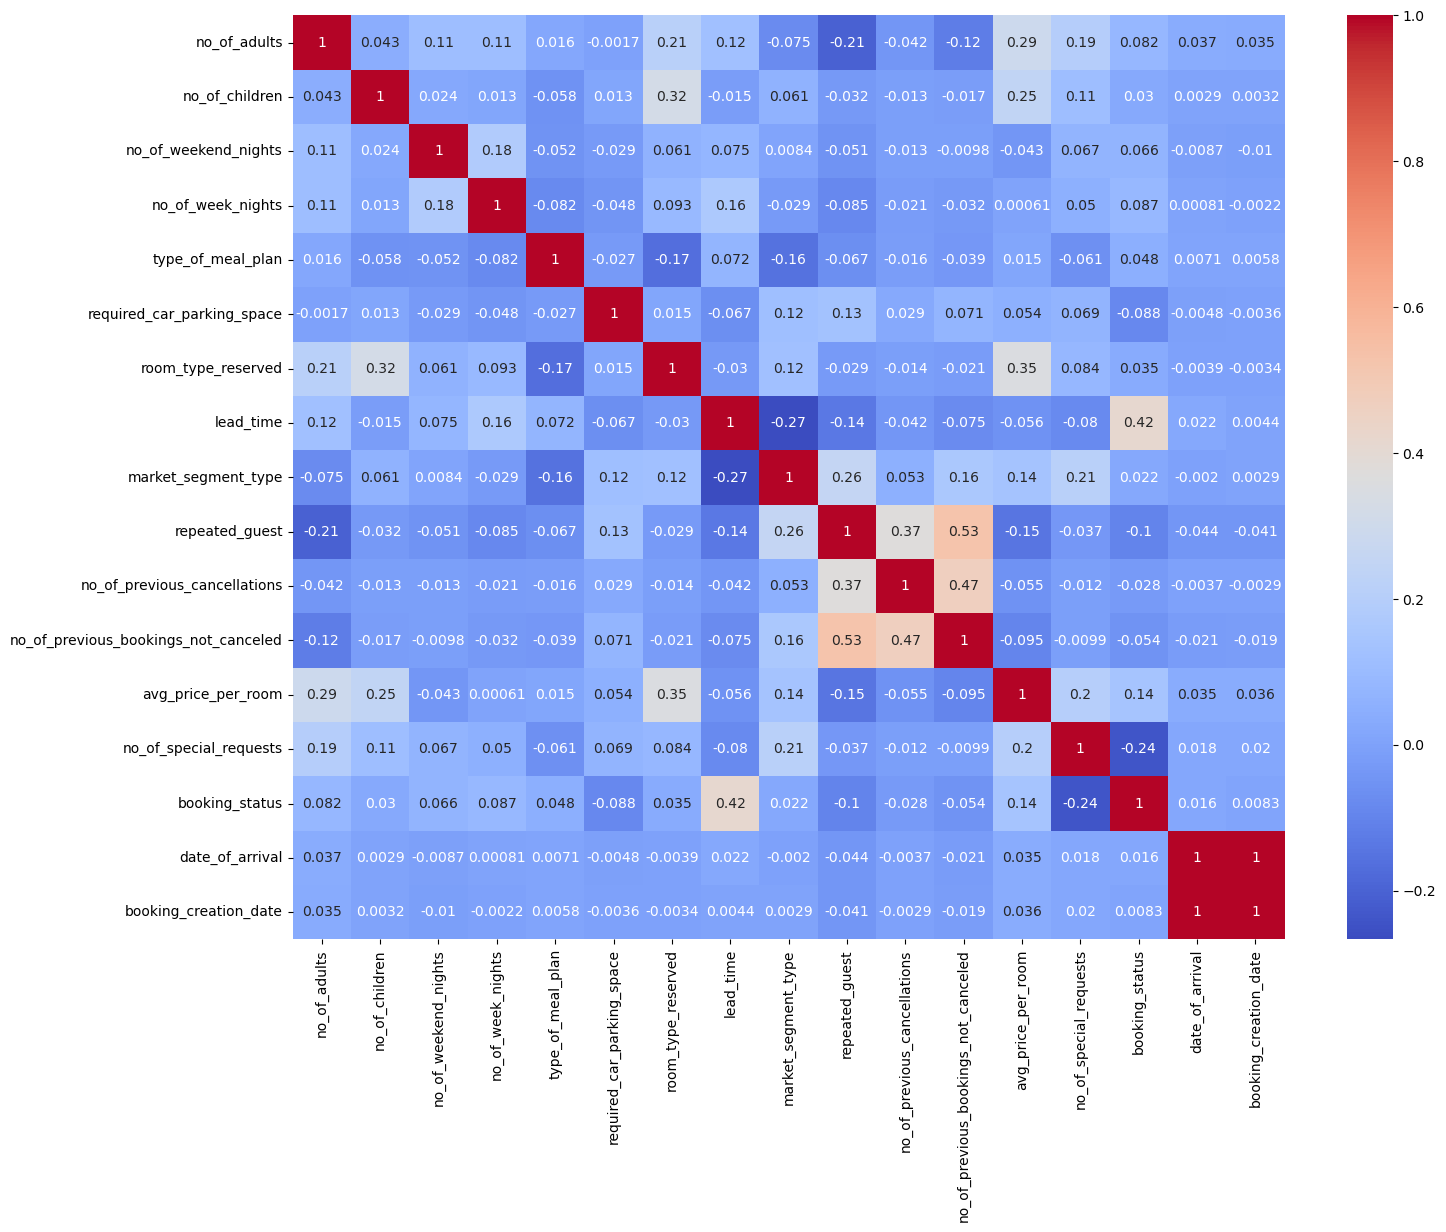

In [18]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [19]:
#droping booking_creation_date due to high correlation with date of arrival
df.drop(columns=['booking_creation_date'], inplace=True)

In [20]:
#as the model doesnt work with dates i will need to drop the date of arrival also
df.drop(columns=['date_of_arrival'], inplace=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('booking_status', axis=1), df['booking_status'], test_size=0.2, random_state=42)

DECISION TREE

In [22]:
dtree = DecisionTreeClassifier()

In [23]:
#grid search parameters
grid_param = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state' : [0,42]
}

#grid search object
grid_search = GridSearchCV(estimator=dtree, param_grid=grid_param, cv=5, n_jobs=-1, scoring='accuracy')

#fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

#best parameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [24]:
#decision tree classifier object with best parameters
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=0)

#Training the model
dtree.fit(X_train, y_train)

#Training accuracy
print(dtree.score(X_train, y_train))

#Predicting the test set results
d_pred = dtree.predict(X_test)

0.8535190063981934


RANDOM FOREST CLASSIFIER

In [26]:
#random forest classifier object
rfc = RandomForestClassifier()

In [27]:
#grid search parameters
grid_param = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state' : [0,42]
}

#grid search object
grid_search = GridSearchCV(estimator=rfc, param_grid=grid_param, cv=5, n_jobs=-1)

#fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

#best parameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 0}


In [28]:
#random forest classifier object with best parameters
rfc = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=0)

#Training the model
rfc.fit(X_train, y_train)

#Training accuracy
print(rfc.score(X_train, y_train))

#Predicting the test set results
r_pred = rfc.predict(X_test)

0.8448626270229582


LOGISTIC REGRESSION

In [29]:
#logistic regression object
logreg = LogisticRegression()

In [30]:
#grid search parameters
grid_param = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001,0.01,0.1,1,10,100,1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'random_state' : [0,42]
}

#grid search object
grid_search = GridSearchCV(estimator=logreg, param_grid=grid_param, cv=5, n_jobs=-1)

#fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

#best parameters
print(grid_search.best_params_)

/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3

/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/pytho

/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters


/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`

/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:

/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: Co

/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters


/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3

/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: Co

/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converg

/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: 

/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/I

/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/pytho

/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:11

/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:11

/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/pytho

/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:45

/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated

/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/pytho

/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yaelzilberman/anaconda3/envs/Ironhack/lib/pytho

{'C': 0.001, 'penalty': 'none', 'random_state': 0, 'solver': 'saga'}


In [31]:
#logistic regression object with best parameters
logreg = LogisticRegression(C=1, penalty='l2', random_state=0, solver='liblinear')

#Training the model
logreg.fit(X_train, y_train)

#Training accuracy
print(logreg.score(X_train, y_train))

#Predicting the test set results
l_pred = logreg.predict(X_test)

0.7870530673692134


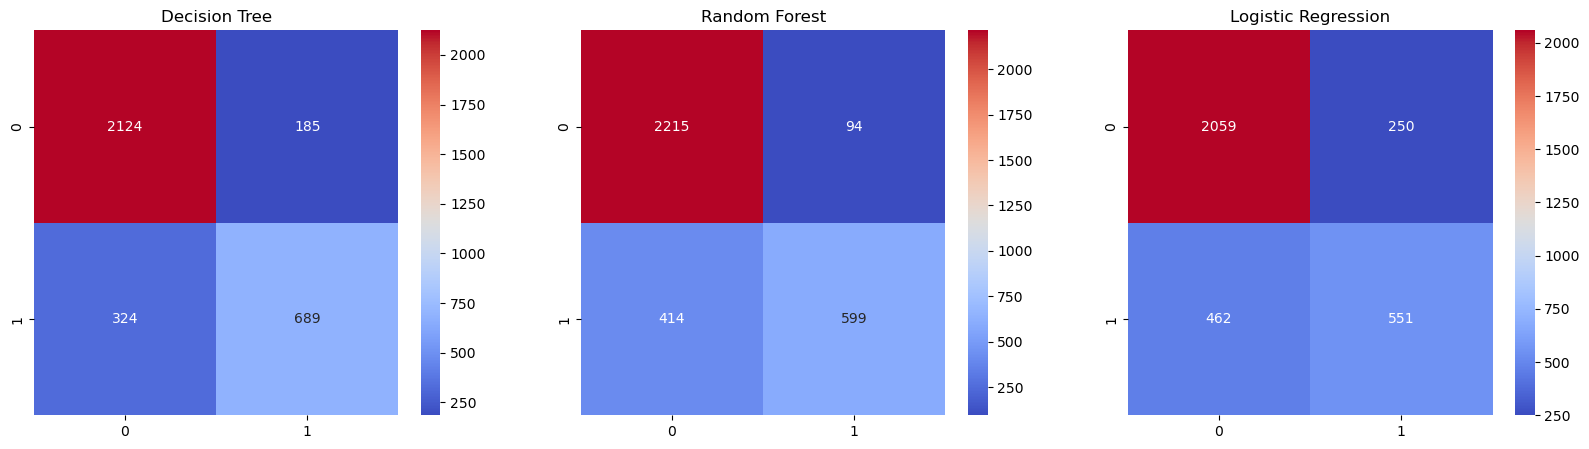

In [32]:
models = ['Decision Tree', 'Random Forest', 'Logistic Regression']
predictions = [d_pred, r_pred, l_pred]

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for i, model_name in enumerate(models):
    sns.heatmap(confusion_matrix(y_test, predictions[i]), annot=True, cmap='coolwarm', fmt='d', ax=ax[i]).set_title(model_name)

plt.show()

Text(0.5, 1.0, 'Decision Tree')

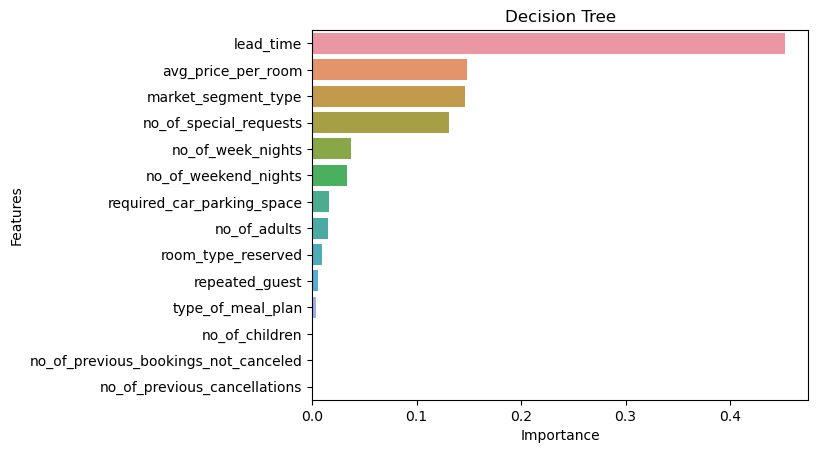

In [33]:
#decision tree
feature_importance = pd.DataFrame({'Features': X_train.columns, 'Importance': dtree.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_importance).set_title('Decision Tree')

Text(0.5, 1.0, 'Random Forest')

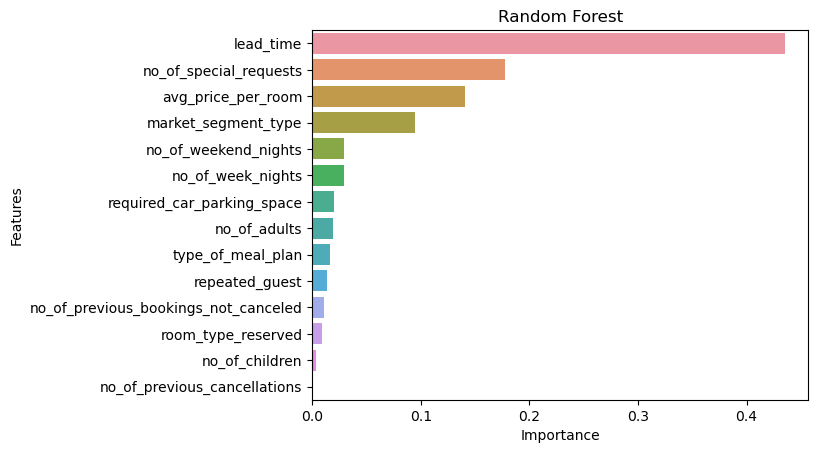

In [34]:
#random forest
feature_importance = pd.DataFrame({'Features': X_train.columns, 'Importance': rfc.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_importance).set_title('Random Forest')